In [1]:
# TensorFlow/Keras imports
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Other libraries
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Data Assets/Faces/Train'
valid_path = 'Data Assets/Faces/Test'

In [3]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
# useful for getting number of classes
folders = glob('Data Assets/Faces/Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │         100,356 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# img = load_img('Data Assets/Faces/Train/Ronaldo/r3.jpeg')
# i = 0
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='Data Assets/Faces/Train/Ronaldo', save_prefix='Ronaldo', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

In [13]:
training_set = train_datagen.flow_from_directory('Data Assets/Faces/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 363 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Data Assets/Faces/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4 images belonging to 4 classes.


In [15]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [16]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\manpr\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.4931 - loss: 1.6548 - val_accuracy: 0.5000 - val_loss: 2.7973
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8127 - loss: 0.5673 - val_accuracy: 0.5000 - val_loss: 1.4981
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.9697 - loss: 0.1531 - val_accuracy: 0.2500 - val_loss: 2.3914
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.9835 - loss: 0.0776 - val_accuracy: 0.5000 - val_loss: 2.0513
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.9890 - loss: 0.0715 - val_accuracy: 0.2500 - val_loss: 2.5174


In [28]:
img_path = "Data Assets/Faces/Test/Novak/n.jpeg"
img = load_img(img_path, target_size=(224, 224))  # PIL image
x = img_to_array(img)                              # Convert to NumPy array
x = np.expand_dims(x, axis=0)                      # Add batch dimension
x = x / 255.0                                      # Rescale if you did in training

# Predict
prediction = model.predict(x)
print(prediction) ## probabilities of all 4 categories

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
[[0.2630659  0.4136427  0.02671387 0.29657745]]


In [29]:
import numpy as np

predicted_class_index = np.argmax(prediction, axis=1)[0]  # gives 3
class_labels = list(training_set.class_indices.keys())    # e.g., ['Cat', 'Dog', 'Lion', 'Tiger']
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class index:", predicted_class_index)
print("Predicted class label:", predicted_class_label)

Predicted class index: 1
Predicted class label: Federer


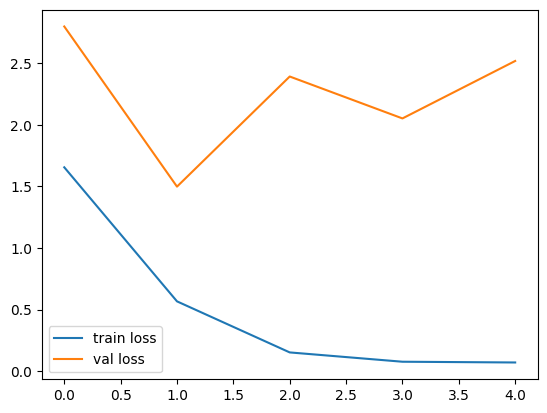

<Figure size 640x480 with 0 Axes>

In [19]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


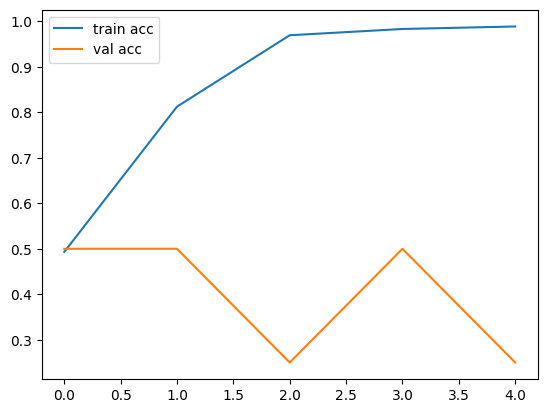

<Figure size 640x480 with 0 Axes>

In [20]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [31]:
import requests
import zipfile
import os

# URL of the repo archive (branch = main)
url = "https://github.com/mappy92/Data_Science_Projects_Data_Files/raw/refs/heads/main.zip"

# Local file to save
local_zip = "Data_Science_Projects_Data_Files.zip"

# Download the zip
with requests.get(url, stream=True) as r:
    if r.status_code == 200:
        with open(local_zip, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
        print("✅ Repo archive downloaded")
    else:
        raise Exception(f"Failed to download: {r.status_code}")

# Optional: Extract the ZIP
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall("Data_Science_Projects_Data_Files")
    print("✅ Repo extracted")

Exception: Failed to download: 404